# Apple Stock

Author: Mia [Nguyen Thao My] Ta

Course Project, UC Irvine, Math 10, S22

## Introduction

The purpose of the project is to estimate Apple's future stock price using historical data and linear regression. Analyzing stock data to predict the expected value of a company's stock and displaying stock movement over time.

## Section 1: Clean up Dataset

In [ ]:
import pandas as pd
import numpy as np
import altair as alt
from altair import Chart, X, Y
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("AAPL.csv")
df = df.dropna()
df

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


Define DataFrame and getting exact `weekday` and `month`.

In [ ]:
df = df.iloc[:,1:15]
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values(by="date")
df["weekday"] = df["date"].dt.day_name()
df["month"] = df["date"].dt.month
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,weekday,month
0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0,Wednesday,5
1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0,Thursday,5
2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0,Friday,5
3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0,Monday,6
4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0,Tuesday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0,Monday,5
1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0,Tuesday,5
1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0,Wednesday,5
1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0,Thursday,5


We can observe the distribution of data points on different days of the week from the chart displayed below. 

In [ ]:
days = [pd.to_datetime(f"2022-06-{x}").day_name() for x in range (6,13,1)]
df[days] = 0
for i in days:
    df.loc[df["weekday"] == i,i] = 1
df[days].sum(axis=0)

Monday       236
Tuesday      257
Wednesday    257
Thursday     255
Friday       253
Saturday       0
Sunday         0
dtype: int64

## Section 2: Data Graph

Let's take a look at the Apple stock trends for the past couple years.

In [ ]:
mark = alt.selection_single(nearest = True, on = "mouseover", fields = ["date"], empty = 'none')

main = alt.Chart().mark_point().encode(
    x="date:T",
    tooltip=["date", "weekday", "adjClose", "close"],
    opacity=alt.value(0),
).add_selection(mark)
line = alt.Chart().mark_line().encode(
        x= alt.X("date", title="Date"),
        y= alt.Y("adjClose",  axis = alt.Axis(title="", format = "$f")),
    )

rule = alt.Chart().mark_rule(color="gray").encode(
    x="date:T",
).transform_filter(mark)

c = alt.layer(main,line,rule, data = df, title = "Apple Stock Price").add_selection(mark)
c

alt.LayerChart(...)

In stead of looking at all the data points, we could gather a subdata and look at the trend at that specific period. The following function `day(x)` will take an input x and displays a DataFrame of all data points with the same day x. In this case, we are looking at the DataFrame on the 5th of every month. If there is a missing month, for example, we go from June 5th, 2015 to August 5th, 2015, then July 5th, 2017 must fall on the weekend (either Saturday or Sunday).

In [ ]:
#This is a subDataFrame of all 5th days.
def day(x):
    return df[df["date"].dt.day == x]
day(5)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,...,splitFactor,weekday,month,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
7,AAPL,2015-06-05 00:00:00+00:00,128.65,129.6900,128.3600,129.500,35626800,118.553986,119.512370,118.286744,...,1.0,Friday,6,0,0,0,0,1,0,0
49,AAPL,2015-08-05 00:00:00+00:00,115.40,117.4400,112.1000,112.950,98384461,106.343801,108.223708,103.302773,...,1.0,Wednesday,8,0,0,1,0,0,0,0
91,AAPL,2015-10-05 00:00:00+00:00,110.78,111.3698,109.0700,109.880,52064743,102.547449,103.093418,100.964527,...,1.0,Monday,10,1,0,0,0,0,0,0
114,AAPL,2015-11-05 00:00:00+00:00,120.92,122.6900,120.1800,121.850,39552680,112.415257,114.060767,111.727304,...,1.0,Thursday,11,0,0,0,1,0,0,0
154,AAPL,2016-01-05 00:00:00+00:00,102.71,105.8500,102.4100,105.750,55790992,95.486033,98.405185,95.207133,...,1.0,Tuesday,1,0,1,0,0,0,0,0
176,AAPL,2016-02-05 00:00:00+00:00,94.02,96.9200,93.6900,96.520,46418064,87.877747,90.588292,87.569306,...,1.0,Friday,2,0,0,0,0,1,0,0
216,AAPL,2016-04-05 00:00:00+00:00,109.81,110.7300,109.4200,109.510,26578652,102.636199,103.496096,102.271677,...,1.0,Tuesday,4,0,1,0,0,0,0,0
238,AAPL,2016-05-05 00:00:00+00:00,93.24,94.0700,92.6800,94.000,35890500,87.681466,88.461986,87.154851,...,1.0,Thursday,5,0,0,0,1,0,0,0
279,AAPL,2016-07-05 00:00:00+00:00,94.99,95.4000,94.4600,95.390,27705210,89.327139,89.712697,88.828736,...,1.0,Tuesday,7,0,1,0,0,0,0,0
302,AAPL,2016-08-05 00:00:00+00:00,107.48,107.6500,106.1800,106.270,40553402,101.616715,101.777441,100.387633,...,1.0,Friday,8,0,0,0,0,1,0,0


In [ ]:
sel = alt.selection_single(fields=["month"])
def draw_by_day(x):
    day(x)
    c = alt.Chart(day(x), title = f"Apple Stock Price on Day {x}").mark_circle(color = "red").encode(
        x= alt.X("date", title = "Date"),
        y= alt.Y("adjClose", axis = alt.Axis(title="", format = "$f")),
        tooltip=["date", "weekday", "adjClose", "close"],
        size=alt.condition(sel, alt.value(80),alt.value(30))
    ).add_selection(sel)
    return c

draw_by_day(5)

alt.Chart(...)

In [ ]:
c+draw_by_day(5)

alt.LayerChart(...)

With function `day(x)`, I got a DataFrame with all 5th days, though when I'm trying to sketch Apple's stock using this DataFrame, all of the points got shifted to a day prior. I hypothesize that this issue might occur due to the time zone difference since all the dates are 00:00. To confirm this idea, I created column `df["Date"] = df["date"].dt.date` which contains dates without hour. However, when I could not compute altChart with data from `Date`, the error alert `TypeError: Object of type date is not JSON serializable`. I also try to create an alt.Chart with data from `Date2`, a column containing only days, the output is still the same. Hence, I believe this is Deepnote error.

In [ ]:
df["Date2"] = df["date"].dt.day
df["Date2"]

0       27
1       28
2       29
3        1
4        2
        ..
1253    18
1254    19
1255    20
1256    21
1257    22
Name: Date2, Length: 1258, dtype: int64

In [ ]:
def day2(x):
    return df[df["Date2"] == x]

def draw_by_day2(x):
    day2(x)
    c = alt.Chart(day(x), title = f"Apple Stock Price on Day {x}").mark_circle(color = "red").encode(
        x= alt.X("date", title = "Date"),
        y= alt.Y("adjClose", axis = alt.Axis(title="", format = "$f")),
        tooltip=["date", "weekday", "adjClose", "close"],
        size=alt.condition(sel, alt.value(80),alt.value(30))
    ).add_selection(sel)
    return c

draw_by_day2(5)

alt.Chart(...)

The distribution chart of volume. 

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


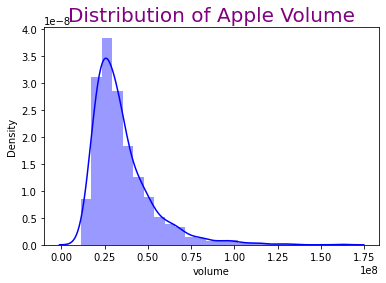

In [ ]:
sns.distplot(df.volume, bins=25, color="b")
plt.title("Distribution of Apple Volume", fontsize=20, color = 'Purple')
plt.show()

## Section 3: Linear Regression

There are some commonly used indicators such as moving averages (SMA, EMA, MACD), relative Strength index (RSI), or bollinger bands (BBANDS). For our data, we will use exponetial moving average (EMA). First we need to calculate the 15-day Exponential Moving Averages (EMA15) and add `EMA15` column to our DataFrame.

In [ ]:
df["EMA15"] = df["adjClose"].ewm(span=15, min_periods=0, ignore_na = False, adjust=False).mean()
df_sub = df[["date","adjClose","EMA15"]]
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 0 to 1257
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   date      1258 non-null   datetime64[ns, UTC]
 1   adjClose  1258 non-null   float64            
 2   EMA15     1258 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 39.3 KB


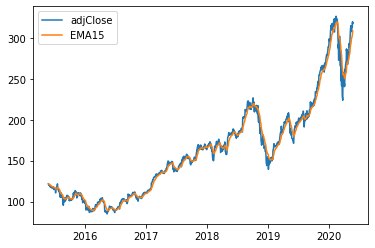

In [ ]:
plt.plot(df_sub["date"],df["adjClose"],label = "adjClose")
plt.plot(df_sub["date"],df["EMA15"], label = "EMA15")
plt.legend()
plt.show()

In [ ]:
chartClose = alt.Chart(df_sub).mark_line(color = "orange").encode(
    x = "date",
    y="adjClose"
)

chartEMA = alt.Chart(df_sub).mark_line(color ="Blue").encode(
    x = "date",
    y = "EMA15"
)

chartClose + chartEMA

alt.LayerChart(...)

Both graphs above are the same; however, I prefer to use `plt.plot`. When we have multiple linear lines, `plt.plot` is easier to label different lines. There is a way to create a title for various linear lines, but it is more complicated. 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import log_loss, mean_squared_error, mean_absolute_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['adjClose']],df[['EMA15']], test_size=0.2)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Mean Absolute Error is", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination is", r2_score(y_test,y_pred))

Mean Absolute Error is 3.8818754599384966
Coefficient of Determination is 0.9899721051486294


The graph below represents the observed values and predicted values on day x. The red dots are observed values whereas the purple line represents the predicted values.

In [ ]:
df["Pred"] = reg.predict(df[["adjClose"]])
def pred_chart(x):
    day(x)
    c = alt.Chart(day(x), title = f"Apple's Stock Predicted and Observed Values on Day {x}").mark_circle(color = "red").encode(
        x= alt.X("date", scale=alt.Scale(zero=False)),
        y= alt.Y("adjClose", scale=alt.Scale(zero=False)),
    )
    c1 = alt.Chart(day(x)).mark_line(color = "Purple"). encode(
        x = alt.X("date",scale=alt.Scale(zero=False)),
        y = alt.Y("Pred",scale=alt.Scale (zero=False))
    )
    return c + c1

pred_chart(5)
        

alt.LayerChart(...)

## Section 4: K-Nearest Neighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

K-Nearest Neighbors R egressor is a non-parametric method to estimate the association between the independent and continuous outcomes by averaging observations from the same neighborhood. In this case, I'll use 'n neighbors = 10', which will take the ten closest points to take the average.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['adjClose']],df[['EMA15']], test_size=0.2)
reg1 = KNeighborsRegressor(n_neighbors=10)
reg1.fit(X_train,y_train)
reg1.predict(X_test)
print("Mean Test Absolute Error is", mean_absolute_error(reg1.predict(X_test), y_test))
print("Mean Train Absolute Error is", mean_absolute_error(reg1.predict(X_train), y_train))

Mean Test Absolute Error is 3.6018819215316356
Mean Train Absolute Error is 3.3270751521487245


Function `get_scores(k)` will take an input k to calculate the mean absolute train error and mean absolute test error and from there I can create a DataFrame of train error and test error for range k from 1 to 150.

In [ ]:
def get_scores(k):
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train, y_train)
    train_error = mean_absolute_error(reg.predict(X_train), y_train)
    test_error = mean_absolute_error(reg.predict(X_test), y_test)
    return (test_error, train_error)

get_scores(10)

(3.6018819215316356, 3.3270751521487245)

In [ ]:
df_scores = pd.DataFrame({"k":range(1,150),"train_error":np.nan,"test_error":np.nan})
for i in df_scores.index:
    df_scores.loc[i,["train_error","test_error"]] = get_scores(df_scores.loc[i,"k"])

df_scores

,k,train_error,test_error
0,1,4.934897,0.043639
1,2,4.469894,2.293783
2,3,4.152767,2.824419
3,4,3.871697,3.106926
4,5,3.831669,3.206610
...,...,...,...
144,145,5.274543,5.751847
145,146,5.303177,5.779944
146,147,5.327647,5.816586
147,148,5.353606,5.850652


The blue curve denotes training error, while the orange curve denotes test error. Furthermore, we can see that extremely high K values cause underfitting, whereas low K values cause overfitting to occur.

In [ ]:
df_scores["kinv"] = 1/df_scores.k
ctrain = alt.Chart(df_scores).mark_line().encode(
    x = "kinv",
    y = "train_error"
)
ctest = alt.Chart(df_scores).mark_line(color="orange").encode(
    x = "kinv",
    y = "test_error"
)
ctest+ctrain

alt.LayerChart(...)

## Section 5: Candlestick Chart

Instead of using the Scatter() plot, we will create fully interactive chart using `plotly`. By passing the `Close` or `adjClose` price to the y-axis, and we need to specify each of open, high, low, and close by using `add_trace(go.Candlestick(...))`. With `make_subplots()`, we also have another smaller chart at the bottom; this is called a "range slider", and we can drag either side to zoom in/out on a certain chart area. We could hide this range slider by using `figure.update_layout(xaxis_rangeslider_visible = False)`. In the chart below, different colors help distinguish between an up or down day – green for up days and red for down days.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


stock = make_subplots(
            specs=[[{"secondary_y":True}]]
        ).add_trace(go.Candlestick(
                        x=df.date, 
                        open= df["open"], 
                        high=df["high"], 
                        low=df["low"], 
                        close= df["close"],
                        name = 'Price'),
        ).update_layout(title = {"text":"Apple Stock", "x":0.5})
    
stock




## Summary

In this project, I started by cleaning and organizing the data set. Then I constructed a few charts to observe and compare the trend of Apple stock performance and displayed the volume distribution over the last few years. Then, I calculated the 15-day Exponential Moving Average using the collected data. Using linear regression with EMA15 and Adjust Close data to predict future stock prices. I observed a DataFrame of train error and test error with a range of k from 1 to 150 by using the K-Nearest Neighbors Regressor. Finally, I created a candlestick chart with open, high, low, and close values.

## References

* What is the source of your dataset(s)?
    - Kaggle Dataset

* Were any portions of the code or ideas taken from another source?  List those sources here and say how they were used.
    - [Towards Data Science](https://towardsdatascience.com/seaborn-python-8563c3d0ad41) to make distribution graph.
    - [Netflix Stock Price Prediction](https://christopherdavisuci.github.io/UCI-Math-10-W22/Proj/StudentProjects/JiayuWang.html) to calculate EMA.
    - [K-Nearest Neighbors Regressor](https://christopherdavisuci.github.io/UCI-Math-10-W22/Week6/Week6-Wednesday.html)
    - [Python In Office](https://pythoninoffice.com/draw-stock-chart-with-python/) to create candlestick chart.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a5f77fe5-f977-40d3-82f4-96058f499405' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>